In [25]:
import pandas as pd
import numpy as np

In [707]:
pd.read_csv('flight_delays.csv').head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [708]:
data1 = pd.read_csv('flight_delays.csv')

In [709]:
data1.groupby('dep_delayed_15min').count()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
dep_delayed_15min,,,,,,,,
N,80956,80956,80956,80956,80956,80956,80956,80956
Y,19044,19044,19044,19044,19044,19044,19044,19044


In [710]:
print('Доля всех задержек ко всем вылетам:', data1[(data1['dep_delayed_15min'] == 'Y')].count()[0]/data1.count()[0])

Доля всех задержек ко всем вылетам: 0.19044


In [711]:
import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn

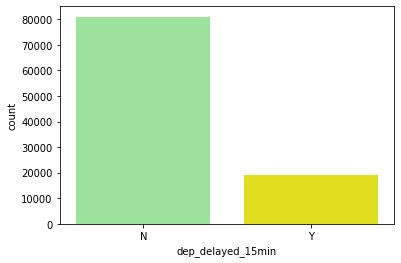

In [712]:
sns.countplot(x='dep_delayed_15min', data=data1, palette = ['lightgreen', 'yellow'])

([<matplotlib.patches.Wedge at 0x3cae0f5f28>,
 [Text(-0.9089330994142737, 0.6195487234989371, 'Без задержки'),
  Text(0.9089330994142736, -0.6195487234989372, 'С задержкой')])

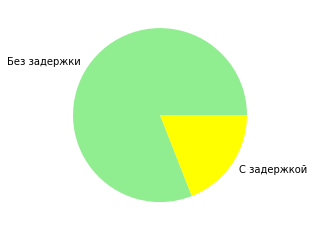

In [713]:
plt.pie(data1.groupby('dep_delayed_15min')['dep_delayed_15min'].count(), colors = ['lightgreen', 'yellow'], labels=["Без задержки","С задержкой"])

In [714]:
#доля задержек рейсов на данные дистанции

In [715]:
a1 = pd.DataFrame(data1[(data1['dep_delayed_15min'] == 'Y')].groupby('Distance').count())
a3 = a1.copy()
a1.head() #с задержкой

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,dep_delayed_15min
Distance,,,,,,,,
30,1,1,1,1,1,1,1,1
31,4,4,4,4,4,4,4,4
36,8,8,8,8,8,8,8,8
41,1,1,1,1,1,1,1,1
47,5,5,5,5,5,5,5,5


In [716]:
a2 = pd.DataFrame(data1.groupby('Distance').count())
a2.head() #все

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,dep_delayed_15min
Distance,,,,,,,,
30,1,1,1,1,1,1,1,1
31,13,13,13,13,13,13,13,13
36,66,66,66,66,66,66,66,66
41,3,3,3,3,3,3,3,3
47,73,73,73,73,73,73,73,73


In [717]:
a3['dep_delayed_15min'] = a1['dep_delayed_15min']/a2['dep_delayed_15min']
a4 = a3.rename(columns={'dep_delayed_15min' : 'proportion of delayed flights'}).drop(columns=['Month', 'DayofMonth','DayOfWeek','DepTime','UniqueCarrier','Origin','Dest'])
a4.head(10)

,proportion of delayed flights
Distance,
30,1.000000
31,0.307692
36,0.121212
41,0.333333
47,0.068493
49,0.250000
56,0.096774
58,0.166667
64,0.075472


In [718]:
a4.index

Int64Index([  30,   31,   36,   41,   47,   49,   56,   58,   64,   67,
            ...
            3266, 3329, 3365, 3784, 4184, 4243, 4431, 4433, 4502, 4962],
           dtype='int64', name='Distance', length=1202)

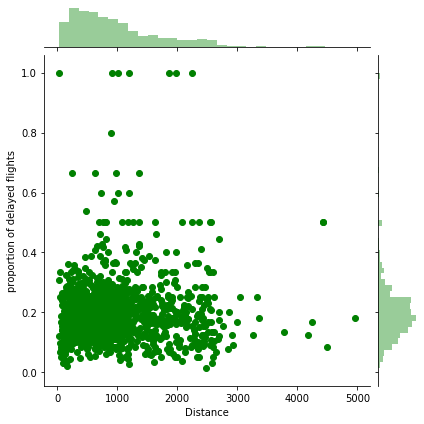

In [719]:
sns.jointplot(x = a4.index, y = 'proportion of delayed flights', ratio = 7, color = 'green', kind = 'scatter', data = a4)

In [720]:
#Топ 5 направлений

In [721]:
b1 = pd.DataFrame(data1[(data1['dep_delayed_15min'] == 'Y')].groupby('Dest').count())
b3 = b1.copy()
b1.head() #с задержкой

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Distance,dep_delayed_15min
Dest,,,,,,,,
ABE,17,17,17,17,17,17,17,17
ABI,8,8,8,8,8,8,8,8
ABQ,110,110,110,110,110,110,110,110
ABY,6,6,6,6,6,6,6,6
ACT,3,3,3,3,3,3,3,3


In [722]:
b2 = pd.DataFrame(data1.groupby('Dest').count())
b2.head() #все

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Distance,dep_delayed_15min
Dest,,,,,,,,
ABE,71,71,71,71,71,71,71,71
ABI,30,30,30,30,30,30,30,30
ABQ,535,535,535,535,535,535,535,535
ABY,16,16,16,16,16,16,16,16
ACK,1,1,1,1,1,1,1,1


In [723]:
b3['dep_delayed_15min'] = b1['dep_delayed_15min']/b2['dep_delayed_15min']
b4 = (b3.rename(columns={'dep_delayed_15min' : 'proportion of delayed flights'})).drop(columns=['Month', 'DayofMonth','DayOfWeek','DepTime','UniqueCarrier','Origin','Distance'])
b4.head(10)

,proportion of delayed flights
Dest,
ABE,0.239437
ABI,0.266667
ABQ,0.205607
ABY,0.375000
ACT,0.093750
ACV,0.185185
ACY,0.105263
ADQ,0.428571
AEX,0.150000


In [724]:
b4.sort_values(by = 'proportion of delayed flights', ascending=False).head(5) #ТОП 5 направлений

,proportion of delayed flights
Dest,
TTN,1.000000
BLI,0.666667
AKN,0.666667
ILG,0.500000
WYS,0.500000


In [725]:
b5 = b1.copy().rename(columns={'dep_delayed_15min' : 'number of delayed flights'}).drop(columns=['Month', 'DayofMonth','DayOfWeek','DepTime','UniqueCarrier','Origin','Distance'])

In [726]:
b5.sort_values(by = 'number of delayed flights', ascending=False).head(5) #по абсолютному значению

,number of delayed flights
Dest,
ATL,1281
ORD,1072
DFW,656
EWR,584
LAX,525


In [727]:
#в какие времена года чаще всего происходят задержки рейсов

In [728]:
c1 = pd.DataFrame(data1[(data1['dep_delayed_15min'] == 'Y')].groupby('Month').count())
c1 = c1.drop(columns=['Dest', 'DayofMonth','DayOfWeek','DepTime','UniqueCarrier','Origin','Distance'])
c1

,dep_delayed_15min
Month,
c-1,1539
c-10,1501
c-11,1397
c-12,1994
c-2,1316
c-3,1676
c-4,1306
c-5,1313
c-6,1867


In [729]:
c2 = pd.DataFrame(data1.groupby('Month').count())
c2 = c2.drop(columns=['Dest', 'DayofMonth','DayOfWeek','DepTime','UniqueCarrier','Origin','Distance'])
c2 #все

,dep_delayed_15min
Month,
c-1,8075
c-10,8405
c-11,8178
c-12,8265
c-2,7418
c-3,8595
c-4,8408
c-5,8543
c-6,8414


In [730]:
c11 = pd.DataFrame()
c11['Season'] = ['Autumn', 'Winter', 'Spring', 'Summer']
c11['dep_delayed_15min'] = [c1['dep_delayed_15min'][11]+c1['dep_delayed_15min'][1]+c1['dep_delayed_15min'][2], c1['dep_delayed_15min'][0]+c1['dep_delayed_15min'][3]+c1['dep_delayed_15min'][4], sum(c1['dep_delayed_15min'][5:8]), sum(c1['dep_delayed_15min'][8:11])]
c11

,Season,dep_delayed_15min
0,Autumn,4177
1,Winter,4849
2,Spring,4295
3,Summer,5723


In [731]:
c22 = pd.DataFrame()
c22['Season'] = ['Autumn', 'Winter', 'Spring', 'Summer']
c22['dep_delayed_15min'] = [c2['dep_delayed_15min'][11]+c2['dep_delayed_15min'][1]+c2['dep_delayed_15min'][2], c2['dep_delayed_15min'][0]+c2['dep_delayed_15min'][3]+c2['dep_delayed_15min'][4], sum(c2['dep_delayed_15min'][5:8]), sum(c2['dep_delayed_15min'][8:11])]
c22

,Season,dep_delayed_15min
0,Autumn,24746
1,Winter,23758
2,Spring,25546
3,Summer,25950


In [732]:
c3 = c11.copy()
c3['dep_delayed_15min'] = c11['dep_delayed_15min']/c22['dep_delayed_15min']
c4 = (c3.rename(columns={'dep_delayed_15min' : 'proportion of delayed flights'}))
c4

,Season,proportion of delayed flights
0,Autumn,0.168795
1,Winter,0.204100
2,Spring,0.168128
3,Summer,0.220539


In [733]:
#P.S. Считаю вручную (не додумался как иначе)

([<matplotlib.patches.Wedge at 0x3caf86feb8>,
 [Text(0.849029387700516, 0.6993919493537848, 'Autumn'),
  Text(-0.6276597394952804, 0.9033511229952155, 'Winter'),
  Text(-0.9407088641119327, -0.5701463259385592, 'Spring'),
  Text(0.6451242933633986, -0.8909627635947395, 'Summer')])

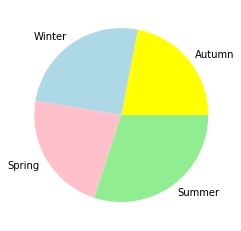

In [734]:
plt.pie(x = 'dep_delayed_15min', data = c11, labels = 'Season', colors = ['yellow', 'lightblue', 'pink', 'lightgreen']) #Всего рейсов по временам года

(<matplotlib.patches.Rectangle at 0x3caf8c1278>,
 <matplotlib.patches.Rectangle at 0x3caf8cc7b8>)

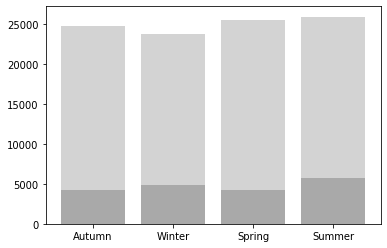

In [735]:
plt.bar(x = 'Season', data=c22, height = 'dep_delayed_15min', color = 'lightgrey')+plt.bar(x = 'Season', data=c11, height = 'dep_delayed_15min', color = 'darkgrey')

In [736]:
#Визуализировал)

In [737]:
#найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [738]:
d1 = pd.DataFrame(data1[(data1['dep_delayed_15min'] == 'Y')].groupby('UniqueCarrier').count())
d3 = d1.copy()
d1.head() #с задержкой

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min
UniqueCarrier,,,,,,,,
AA,1770,1770,1770,1770,1770,1770,1770,1770
AQ,18,18,18,18,18,18,18,18
AS,541,541,541,541,541,541,541,541
B6,393,393,393,393,393,393,393,393
CO,788,788,788,788,788,788,788,788


In [739]:
d2 = pd.DataFrame(data1.groupby('UniqueCarrier').count())
d2.head() #все

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min
UniqueCarrier,,,,,,,,
AA,9418,9418,9418,9418,9418,9418,9418,9418
AQ,234,234,234,234,234,234,234,234
AS,2222,2222,2222,2222,2222,2222,2222,2222
B6,1838,1838,1838,1838,1838,1838,1838,1838
CO,4334,4334,4334,4334,4334,4334,4334,4334


In [740]:
d3['dep_delayed_15min'] = d1['dep_delayed_15min']/d2['dep_delayed_15min']
d4 = (d3.rename(columns={'dep_delayed_15min' : 'proportion of delayed flights'})).drop(columns=['Month', 'DayofMonth','DayOfWeek','DepTime','Dest','Origin','Distance'])
d4.head(10)

,proportion of delayed flights
UniqueCarrier,
AA,0.187938
AQ,0.076923
AS,0.243474
B6,0.213819
CO,0.181818
DH,0.161491
DL,0.168922
EV,0.275318
F9,0.155070


In [741]:
d4.sort_values(by = 'proportion of delayed flights', ascending=True).head(10) #ТОП 10 перевозчиков

,proportion of delayed flights
UniqueCarrier,
HA,0.043307
AQ,0.076923
HP,0.142235
TZ,0.143498
F9,0.155070
DH,0.161491
US,0.167387
NW,0.167890
DL,0.168922


In [ ]:
#найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [752]:
e1 = pd.DataFrame(data1[(data1['dep_delayed_15min'] == 'Y')].groupby('Origin').count())
e3 = e1.copy()
#e1.head() #с задержкой
e2 = pd.DataFrame(data1.groupby('Origin').count())
#e2.head() #все
e3['dep_delayed_15min'] = e1['dep_delayed_15min']/e2['dep_delayed_15min']
e4 = (e3.rename(columns={'dep_delayed_15min' : 'proportion of delayed flights'})).drop(columns=['Month', 'DayofMonth','DayOfWeek','DepTime','Dest','UniqueCarrier','Distance'])
#e4.head(10)
e4.sort_values(by = 'proportion of delayed flights', ascending=False).head(10) #10 плохих аэропортов

,proportion of delayed flights
Origin,
GST,1.000000
ADK,1.000000
AKN,1.000000
LWB,0.750000
BRW,0.714286
GUC,0.666667
ADQ,0.600000
SCC,0.500000
TEX,0.500000


In [754]:
e5 = e1.copy().rename(columns={'dep_delayed_15min' : 'number of delayed flights'}).drop(columns=['Month', 'DayofMonth','DayOfWeek','DepTime','UniqueCarrier','Dest','Distance'])

In [756]:
e5.sort_values(by = 'number of delayed flights', ascending=False).head(10) #по абсолютному значению

,number of delayed flights
Origin,
ATL,1506
ORD,1254
DFW,902
DEN,575
LAX,552
LAS,546
EWR,538
IAH,492
PHX,491


In [757]:
#ищу необычную зависимость... может дни недели???

In [777]:
h1 = pd.DataFrame(data1[(data1['dep_delayed_15min'] == 'Y')]).sort_values(by = 'DayOfWeek')
h1.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
97357,c-6,c-27,c-1,1902,WN,MCI,BWI,967,Y
65318,c-1,c-24,c-1,1230,WN,PDX,RNO,444,Y
86785,c-8,c-7,c-1,2327,B6,MCO,BQN,1129,Y
9487,c-1,c-24,c-1,1738,MQ,LGA,DCA,214,Y
91317,c-2,c-27,c-1,1530,FL,LGA,CAK,396,Y


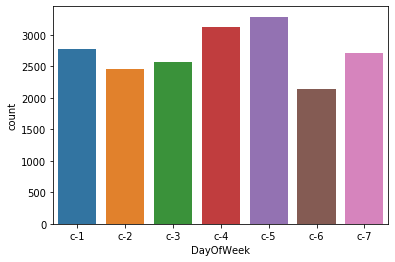

In [779]:
sns.countplot(x='DayOfWeek', data=h1) #ничего необычного((

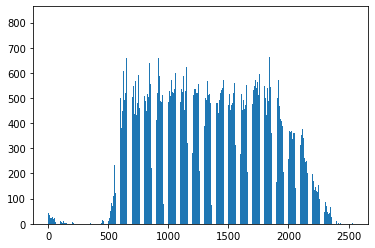

In [780]:
gr1 = plt.hist(x='DepTime', data=data1, bins = 500) #ничего необычного((

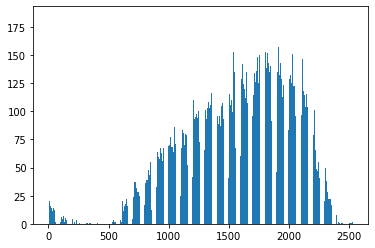

In [781]:
gr2 = plt.hist(x='DepTime', data=h1, bins = 500) #НЕОБЫЧНО!!!!!!

In [ ]:
#Конец!